In [ ]:
# !pip install bing-image-downloader

In [ ]:
# !mkdir Image_dataset

In [ ]:
# from bing_image_downloader import downloader
# downloader.download('nama candi', limit=400, output_dir='Image_dataset', adult_filter_off=True)

In [ ]:
# folder_path = "/content/drive/MyDrive/ML_Project/Dataset/candi/Candi_Borobudur"

# # Mendapatkan daftar file dalam folder
# files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and not f.startswith('.')]
# files.sort()


# for i, old_name in enumerate(files, start=1):
#     # ekstensi file (seperti .jpg, .png, dll)
#     _, file_extension = os.path.splitext(old_name)

#     if not file_extension:
#         file_extension = '.jpg'
#     # penamaan
#     new_name = f"image_{i}{file_extension}"

#     old_path = os.path.join(folder_path, old_name)
#     new_path = os.path.join(folder_path, new_name)
#     os.rename(old_path, new_path)
#     print(f"Renamed: {old_name} -> {new_name}")

# print("Selesai mengganti nama semua file.")

Renamed: 12063204065.jpg -> image_1.jpg
Renamed: 24005257768.jpg -> image_2.jpg
Renamed: 24474065337.jpg -> image_3.jpg
Renamed: 24474072247.jpg -> image_4.jpg
Renamed: 24914237838.jpg -> image_5.jpg
Renamed: 25307334877.jpg -> image_6.jpg
Renamed: 25372317788.jpg -> image_7.jpg
Renamed: 25372323778.jpg -> image_8.jpg
Renamed: 25372325108.jpg -> image_9.jpg
Renamed: 25436596538.jpg -> image_10.jpg
Renamed: 25469258128.jpg -> image_11.jpg
Renamed: 26132076857.jpg -> image_12.jpg
Renamed: 26198514629.jpg -> image_13.jpg
Renamed: 26494769809.jpg -> image_14.jpg
Renamed: 27081641768.jpg -> image_15.jpg
Renamed: 27155049008.jpg -> image_16.jpg
Renamed: 27175095318.jpg -> image_17.jpg
Renamed: 27175098018.jpg -> image_18.jpg
Renamed: 27334967648.jpg -> image_19.jpg
Renamed: 27561210119.jpg -> image_20.jpg
Renamed: 27561214529.jpg -> image_21.jpg
Renamed: 27687893627.jpg -> image_22.jpg
Renamed: 27803941508.jpg -> image_23.jpg
Renamed: 28405302628.jpg -> image_24.jpg
Renamed: 28971802558.jpg 

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Mengimpor libraries umum yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm import tqdm
from tqdm.notebook import tqdm as tq
from collections import defaultdict


# Mengimpor libraries untuk visualisasi
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# Mengimpor libraries untuk pemrosesan data gambar
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

# Mengimpor libraries untuk pembuatan dan evaluasi model
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau

# Mengabaikan peringatan
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import module yang disediakan google colab untuk kebutuhan upload file
from google.colab import files

# Import libraries untuk spilt data
from sklearn.model_selection import train_test_split


## Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = "/content/drive/MyDrive/ML_Project/Dataset"

total_files = 0
class_file_counts = defaultdict(int)

for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            total_files += 1
            label = os.path.basename(root)
            class_file_counts[label] += 1

# Tampilkan hasil
print(f"Total file gambar di dataset: {total_files}\n")
print("Jumlah file per kelas:")
for label, count in sorted(class_file_counts.items()):
    print(f"- {label}: {count} file")


Total file gambar di dataset: 5360

Jumlah file per kelas:
- Benteng_Vredeburg: 156 file
- Candi_Abang: 119 file
- Candi_Banyunibo: 168 file
- Candi_Barong: 179 file
- Candi_Borobudur: 379 file
- Candi_Bubrah: 128 file
- Candi_Dawangsari: 44 file
- Candi_Gana: 58 file
- Candi_Gebang: 108 file
- Candi_Gunung Wukir_Canggal: 39 file
- Candi_Ijo: 152 file
- Candi_Kalasan: 98 file
- Candi_Kedulan: 67 file
- Candi_Kimpulan PustakasalaUII: 68 file
- Candi_Klodangan: 53 file
- Candi_Lumbung: 120 file
- Candi_Plaosan_Kidul: 189 file
- Candi_Plaosan_Lor: 195 file
- Candi_Prambanan: 289 file
- Candi_Sambisari: 120 file
- Candi_Sari: 127 file
- Candi_Sewu: 140 file
- Candi_WatuGudig: 45 file
- Gedung_Agung_Istana_Kepresidenan_Yogyakarta: 120 file
- Keraton_Ngayogyakarta_Hadiningrat: 119 file
- Makam_Raja_Mataram_Imogiri: 130 file
- Masjid_Gedhe_Kauman: 161 file
- Monumen_Serangan_Umum_1Maret: 127 file
- Museum_Benteng_Vredeburg: 123 file
- Museum_Dewantara_Kirti_Griya: 103 file
- Museum_Geoteknolo

In [ ]:
# base_dir = "/content/drive/MyDrive/ML_Project/Dataset"
# target_dir = "/content/drive/MyDrive/ML_Project/Split_Datasets"

# from PIL import Image

# valid_image_paths = []

# for root, dirs, files in os.walk(base_dir):
#     for file in files:
#         if file.lower().endswith(('.jpg', '.jpeg', '.png')):
#             full_path = os.path.join(root, file)
#             label = os.path.basename(os.path.dirname(full_path))  # Nama folder terakhir sebagai label
#             try:
#                 # Coba buka gambar dan verifikasi
#                 with Image.open(full_path) as img:
#                     img.verify()  # Deteksi gambar corrupt/truncated
#                 valid_image_paths.append((full_path, label))
#             except Exception as e:
#                 print(f" Gambar rusak atau tidak bisa dibaca: {full_path} ({str(e)})")


# # Kelompokkan file berdasarkan label (nama folder terakhir)
# from collections import defaultdict
# label_to_images = defaultdict(list)

# for path, label in valid_image_paths:
#     label_to_images[label].append(path)

# # Buat direktori target berdasarkan label dan split
# for split in ["train", "val", "test"]:
#     for label in label_to_images:
#         os.makedirs(os.path.join(target_dir, split, label), exist_ok=True)

# # Split dan salin gambar ke folder yang sesuai
# for label, images in label_to_images.items():
#     train_val, test = train_test_split(images, test_size=0.1, random_state=42)
#     train, val = train_test_split(train_val, test_size=0.2, random_state=42)

#     for img in train:
#         shutil.copy(img, os.path.join(target_dir, "train", label))
#     for img in val:
#         shutil.copy(img, os.path.join(target_dir, "val", label))
#     for img in test:
#         shutil.copy(img, os.path.join(target_dir, "test", label))

# print(" Selesai memproses split dataset per objek spesifik.")

In [ ]:
base_dir = "/content/drive/MyDrive/ML_Project/Split_Datasets"

total_files = 0
class_file_counts = defaultdict(int)

for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            total_files += 1
            label = os.path.basename(root)
            class_file_counts[label] += 1

# Tampilkan hasil
print(f" Total file gambar di dataset: {total_files}\n")
print(" Jumlah file per kelas:")
for label, count in sorted(class_file_counts.items()):
    print(f"- {label}: {count} file")


 Total file gambar di dataset: 5354

 Jumlah file per kelas:
- Benteng_Vredeburg: 156 file
- Candi_Abang: 119 file
- Candi_Banyunibo: 168 file
- Candi_Barong: 179 file
- Candi_Borobudur: 379 file
- Candi_Bubrah: 128 file
- Candi_Dawangsari: 44 file
- Candi_Gana: 58 file
- Candi_Gebang: 108 file
- Candi_Gunung Wukir_Canggal: 39 file
- Candi_Ijo: 152 file
- Candi_Kalasan: 98 file
- Candi_Kedulan: 67 file
- Candi_Kimpulan PustakasalaUII: 68 file
- Candi_Klodangan: 53 file
- Candi_Lumbung: 120 file
- Candi_Plaosan_Kidul: 189 file
- Candi_Plaosan_Lor: 195 file
- Candi_Prambanan: 289 file
- Candi_Sambisari: 120 file
- Candi_Sari: 127 file
- Candi_Sewu: 140 file
- Candi_WatuGudig: 45 file
- Gedung_Agung_Istana_Kepresidenan_Yogyakarta: 120 file
- Keraton_Ngayogyakarta_Hadiningrat: 119 file
- Makam_Raja_Mataram_Imogiri: 130 file
- Masjid_Gedhe_Kauman: 161 file
- Monumen_Serangan_Umum_1Maret: 127 file
- Museum_Benteng_Vredeburg: 123 file
- Museum_Dewantara_Kirti_Griya: 101 file
- Museum_Geotekno

In [ ]:
split_base = "/content/drive/MyDrive/ML_Project/Split_Datasets"
data_split  = []
for split in ['train', 'val', 'test']:
    split_path = os.path.join(split_base, split)
    for label in os.listdir(split_path):
        label_path = os.path.join(split_path, label)
        if not os.path.isdir(label_path):
            continue
        for file in os.listdir(label_path):
            file_path = os.path.join(label_path, file)
            data_split.append({
                "filepath": file_path,
                "label": label,
                "split": split
            })

df_split = pd.DataFrame(data_split)
print("====================================================")
print("Total kelas:", df_split["label"].nunique())
print("\nJumlah file per split:")
print("====================================================")
print(df_split["split"].value_counts())
print("====================================================")
print("\nJumlah file per kelas:")
print("====================================================")
print(df_split["label"].value_counts())
print("====================================================")

Total kelas: 43

Jumlah file per split:
split
train    3830
val       976
test      548
Name: count, dtype: int64

Jumlah file per kelas:
label
Candi_Borobudur                                379
Candi_Prambanan                                289
Candi_Plaosan_Lor                              195
Candi_Plaosan_Kidul                            189
Candi_Barong                                   179
Candi_Banyunibo                                168
Masjid_Gedhe_Kauman                            161
Museum_TNIAD_Dharma_Wiratama                   159
Museum_Gunungapi_Merapi                        158
Benteng_Vredeburg                              156
Candi_Ijo                                      152
Candi_Sewu                                     140
Museum_Geoteknologi_Mineral UPN                139
Taman_Sari                                     138
Makam_Raja_Mataram_Imogiri                     130
Candi_Bubrah                                   128
Candi_Sari                              

## Data Loading

In [ ]:
train_path = "/content/drive/MyDrive/ML_Project/Split_Datasets/train"
category_images = {}


# Mengisi kamus dengan daftar file gambar per kelas dari folder train
for class_name in os.listdir(train_path):
    class_dir = os.path.join(train_path, class_name)
    if os.path.isdir(class_dir):
        image_files = [f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        category_images[class_name] = image_files

# Menampilkan 5 gambar kelas train
fig, axs = plt.subplots(len(category_images), 5, figsize=(15, 3 * len(category_images)))

for i, (class_name, image_list) in enumerate(category_images.items()):
    if len(image_list) < 5:
        print(f"Hanya ada {len(image_list)} gambar dalam kelas: {class_name}")
        images = image_list
    else:
        images = np.random.choice(image_list, 5, replace=False)

    for j, image_name in enumerate(images):
        img_path = os.path.join(train_path, class_name, image_name)
        try:
            img = Image.open(img_path)
            axs[i, j].imshow(img)
            axs[i, j].set(xlabel=class_name, xticks=[], yticks=[])
        except Exception as e:
            print(f"Gagal membuka gambar: {img_path} - {e}")
            axs[i, j].set(xlabel="Corrupt", xticks=[], yticks=[])

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

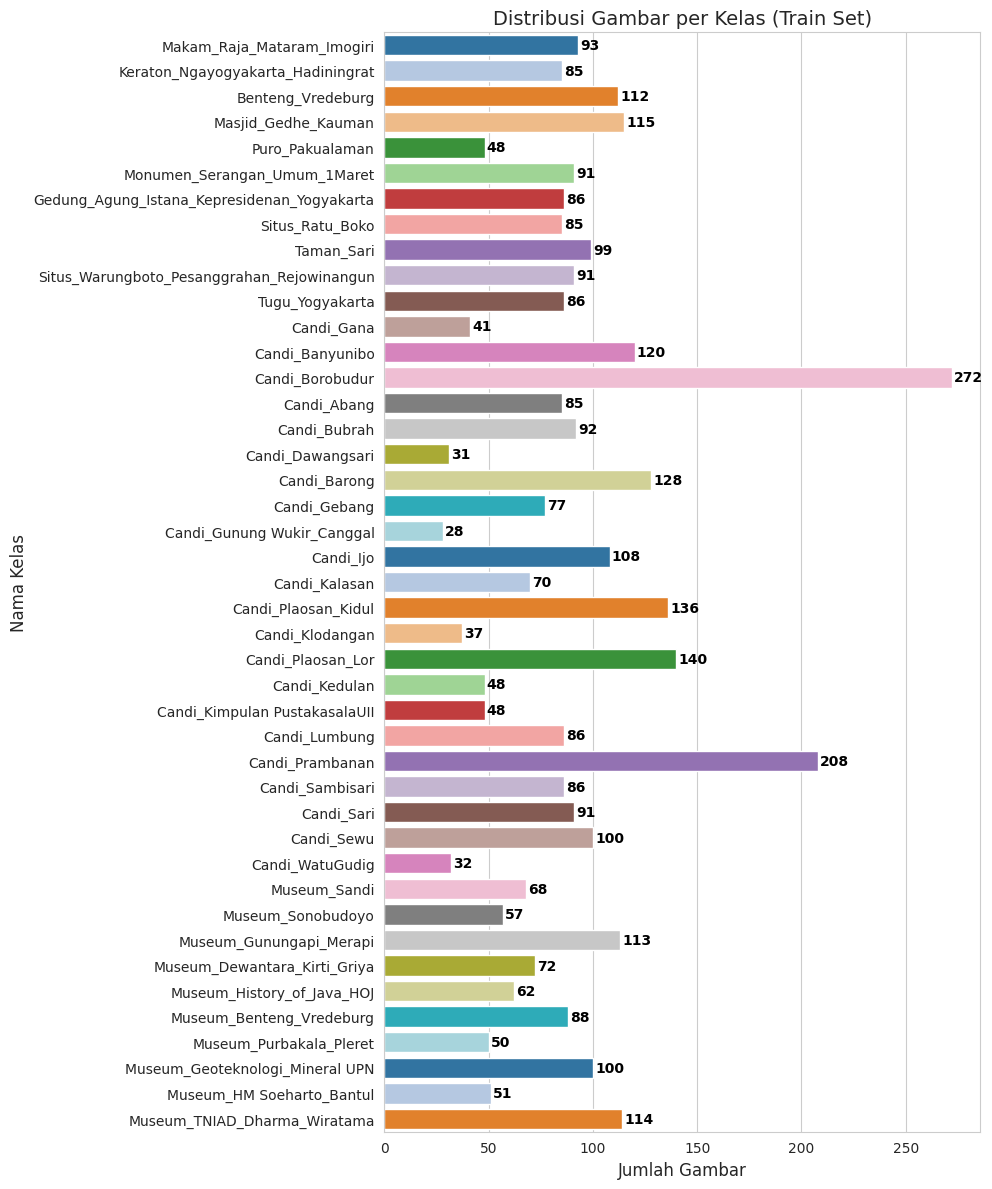

In [ ]:
train_path = "/content/drive/MyDrive/ML_Project/Split_Datasets/train"

file_name = []
labels = []
full_path = []

# Loop melalui folder dan file gambar di train
for path, subdirs, files in os.walk(train_path):
    for name in files:
        if name.lower().endswith(('.jpg', '.jpeg', '.png')):
            full_path.append(os.path.join(path, name))
            labels.append(os.path.basename(path))
            file_name.append(name)

# DataFrame
distribution_train = pd.DataFrame({
    "path": full_path,
    "file_name": file_name,
    "labels": labels
})


unique_labels_order = pd.unique(distribution_train["labels"])
distribution_train["labels"] = pd.Categorical(distribution_train["labels"], categories=unique_labels_order, ordered=True)
class_counts = distribution_train["labels"].value_counts().loc[unique_labels_order]

# Plot bar chart
plt.figure(figsize=(10, 12))
sns.set_style("whitegrid")
plot_data = sns.barplot(x=class_counts.values, y=class_counts.index, palette="tab20")

# jumlah gambar
for i, value in enumerate(class_counts.values):
    plot_data.text(value + 1, i, str(value), color='black', va='center', fontweight='bold')

plt.title("Distribusi Gambar per Kelas (Train Set)", fontsize=14)
plt.xlabel("Jumlah Gambar", fontsize=12)
plt.ylabel("Nama Kelas", fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
# base_dir = "/content/drive/MyDrive/ML_Project/Split_Datasets/train"
# augmented_dir = "/content/drive/MyDrive/ML_Project/asli/Augmented_Dataset"
# os.makedirs(augmented_dir, exist_ok=True)

# # Fungsi Transformasi
# def anticlockwise_rotation(img):
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = cv2.resize(img, (224, 224))
#     angle = random.randint(0, 180)
#     return rotate(img, angle)

# def clockwise_rotation(img):
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = cv2.resize(img, (224, 224))
#     angle = random.randint(0, 180)
#     return rotate(img, -angle)

# def flip_up_down(img):
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = cv2.resize(img, (224, 224))
#     return np.flipud(img)

# def add_brightness(img):
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = cv2.resize(img, (224, 224))
#     return adjust_gamma(img, gamma=0.5, gain=1)

# def blur_image(img):
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = cv2.resize(img, (224, 224))
#     return cv2.GaussianBlur(img, (9, 9), 0)

# def sheared(img):
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = cv2.resize(img, (224, 224))
#     transform = AffineTransform(shear=0.2)
#     return warp(img, transform, mode="wrap")

# def warp_shift(img):
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = cv2.resize(img, (224, 224))
#     transform = AffineTransform(translation=(0, 40))
#     return warp(img, transform, mode="wrap")

# def add_gaussian_noise(img):
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = cv2.resize(img, (224, 224))
#     noise = np.random.normal(0, 0.05, img.shape)
#     noisy_img = img / 255.0 + noise
#     return np.clip(noisy_img, 0, 1)

# # === Dictionary transformasi ===
# transformations = {
#     'rotate anticlockwise': anticlockwise_rotation,
#     'rotate clockwise': clockwise_rotation,
#     'warp shift': warp_shift,
#     'blurring image': blur_image,
#     'add brightness': add_brightness,
#     'flip up down': flip_up_down,
#     'shear image': sheared,
#     'gaussian noise': add_gaussian_noise
# }

# # Hitung jumlah gambar per kelas
# jumlah_per_kelas = {}
# for root, dirs, files in os.walk(base_dir):
#     if not dirs:
#         label = os.path.relpath(root, base_dir)
#         jumlah_per_kelas[label] = len([f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png'))])


# augmentasi_target = {}
# # Target tetap 400 untuk semua kelas
# for kelas, jumlah in jumlah_per_kelas.items():
#     if jumlah < 400:
#         augmentasi_target[kelas] = 400 - jumlah
#     else:
#         augmentasi_target[kelas] = 0


# # === Mulai augmentasi per kelas ===
# for root, dirs, files in os.walk(base_dir):
#     if not dirs:
#         relative_path = os.path.relpath(root, base_dir)
#         save_dir = os.path.join(augmented_dir, relative_path)
#         os.makedirs(save_dir, exist_ok=True)

#         jumlah_aug = augmentasi_target.get(relative_path, 0)
#         if jumlah_aug == 0:
#             print(f"{relative_path} sudah cukup, tidak perlu augmentasi.")
#             continue

#         images = [os.path.join(root, f) for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
#         print(f"Augmentasi: {relative_path} - {len(images)} gambar asli, target tambah {jumlah_aug}.")

#         i = 1
#         with tqdm(total=jumlah_aug, desc=relative_path) as pbar:
#             while i <= jumlah_aug:
#                 try:
#                     image = random.choice(images)
#                     img = io.imread(image)
#                     img = cv2.resize(img, (224, 224))

#                     transformed = img.copy()
#                     for _ in range(random.randint(1, 3)):
#                         key = random.choice(list(transformations))
#                         transformed = transformations[key](transformed)

#                     transformed = img_as_ubyte(transformed)
#                     save_path = os.path.join(save_dir, f"{os.path.splitext(os.path.basename(image))[0]}_aug_{i}.jpg")
#                     cv2.imwrite(save_path, cv2.cvtColor(transformed, cv2.COLOR_RGB2BGR))

#                     i += 1
#                     pbar.update(1)
#                 except Exception as e:
#                     print(f"Error augmentasi {image}: {e}")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#pengecekan gambar ada yg rusak apa nda
augmented_dir = "/content/drive/MyDrive/ML_Project/Augmented_Dataset"
bad_images = []

for root, _, files in os.walk(augmented_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            path = os.path.join(root, file)
            try:
                with Image.open(path) as img:
                    img.verify()
            except Exception as e:
                print(f"Bad image: {path}, Error: {e}")
                bad_images.append(path)



In [ ]:
class_counts = defaultdict(int)
for root, _, files in os.walk(augmented_dir):
    if files:
        class_name = os.path.basename(root)
        class_counts[class_name] += len([f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

for cls, count in sorted(class_counts.items(), key=lambda x: x[0]):
    print(f"{cls}: {count} gambar")

Benteng_Vredeburg: 288 gambar
Candi_Abang: 315 gambar
Candi_Banyunibo: 280 gambar
Candi_Barong: 272 gambar
Candi_Borobudur: 128 gambar
Candi_Bubrah: 308 gambar
Candi_Dawangsari: 369 gambar
Candi_Gana: 359 gambar
Candi_Gebang: 323 gambar
Candi_Gunung Wukir_Canggal: 372 gambar
Candi_Ijo: 292 gambar
Candi_Kalasan: 330 gambar
Candi_Kedulan: 352 gambar
Candi_Kimpulan PustakasalaUII: 352 gambar
Candi_Klodangan: 363 gambar
Candi_Lumbung: 314 gambar
Candi_Plaosan_Kidul: 264 gambar
Candi_Plaosan_Lor: 260 gambar
Candi_Prambanan: 192 gambar
Candi_Sambisari: 314 gambar
Candi_Sari: 309 gambar
Candi_Sewu: 300 gambar
Candi_WatuGudig: 368 gambar
Gedung_Agung_Istana_Kepresidenan_Yogyakarta: 314 gambar
Keraton_Ngayogyakarta_Hadiningrat: 315 gambar
Makam_Raja_Mataram_Imogiri: 307 gambar
Masjid_Gedhe_Kauman: 285 gambar
Monumen_Serangan_Umum_1Maret: 309 gambar
Museum_Benteng_Vredeburg: 312 gambar
Museum_Dewantara_Kirti_Griya: 328 gambar
Museum_Geoteknologi_Mineral UPN: 300 gambar
Museum_Gunungapi_Merapi: 2

In [ ]:
original_base_path = "/content/drive/MyDrive/ML_Project/Split_Datasets/train"
augmented_base_path = "/content/drive/MyDrive/ML_Project/Augmented_Dataset"

# Ambil semua nama kelas (subfolder) dari direktori train asli
class_names = sorted(os.listdir(original_base_path))

# Loop untuk setiap kelas
for class_name in class_names:
    original_path = os.path.join(original_base_path, class_name)
    augmented_path = os.path.join(augmented_base_path, class_name)


    # Skip jika bukan folder
    if not os.path.isdir(original_path) or not os.path.isdir(augmented_path):
        continue

    # Ambil daftar gambar dari folder asli dan augmentasi
    original_images = [os.path.join(original_path, f) for f in os.listdir(original_path)
                       if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    augmented_images = [os.path.join(augmented_path, f) for f in os.listdir(augmented_path)
                        if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if not original_images or not augmented_images:
        continue

    # Ambil 5 sampel dari masing-masing (atau semua jika jumlahnya kurang dari 5)
    sample_originals = random.sample(original_images, min(5, len(original_images)))
    sample_augmented = random.sample(augmented_images, min(5, len(augmented_images)))

    # Buat plot 2 baris: baris 1 untuk gambar asli, baris 2 untuk gambar augmentasi
    fig, axs = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle(f"Perbandingan Gambar Original vs Augmented - Kelas {class_name}", fontsize=16)

    # Baris pertama: Original
    for i, img_path in enumerate(sample_originals):
        img = Image.open(img_path)
        axs[0, i].imshow(img)
        axs[0, i].set_title("Original")
        axs[0, i].axis("off")

    # Baris kedua: Augmented
    for i, img_path in enumerate(sample_augmented):
        img = Image.open(img_path)
        axs[1, i].imshow(img)
        axs[1, i].set_title("Augmented")
        axs[1, i].axis("off")

    plt.tight_layout()
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

## Data Preprocessing

In [ ]:
original_base_path = "/content/drive/MyDrive/ML_Project/Split_Datasets/train"
augmented_base_path = "/content/drive/MyDrive/ML_Project/Augmented_Dataset"

file_names = []
labels = []
full_paths = []

#kelas folder asli
class_names = sorted(os.listdir(original_base_path))

for class_name in class_names:
    original_path = os.path.join(original_base_path, class_name)
    augmented_path = os.path.join(augmented_base_path, class_name)

    # pengecekan folder
    if not os.path.isdir(original_path):
        continue

    # Proses data asli
    for fname in os.listdir(original_path):
        if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            full_paths.append(os.path.join(original_path, fname))
            labels.append(class_name)
            file_names.append(fname)

    # Proses data augmentasi
    if os.path.isdir(augmented_path):
        for fname in os.listdir(augmented_path):
            if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                full_paths.append(os.path.join(augmented_path, fname))
                labels.append(class_name)
                file_names.append(fname)

df = pd.DataFrame({
    "path": full_paths,
    "file_name": file_names,
    "labels": labels
})


label_counts = df.groupby('labels').size()
print(label_counts)


labels
Benteng_Vredeburg                              400
Candi_Abang                                    400
Candi_Banyunibo                                400
Candi_Barong                                   400
Candi_Borobudur                                400
Candi_Bubrah                                   400
Candi_Dawangsari                               400
Candi_Gana                                     400
Candi_Gebang                                   400
Candi_Gunung Wukir_Canggal                     400
Candi_Ijo                                      400
Candi_Kalasan                                  400
Candi_Kedulan                                  400
Candi_Kimpulan PustakasalaUII                  400
Candi_Klodangan                                400
Candi_Lumbung                                  400
Candi_Plaosan_Kidul                            400
Candi_Plaosan_Lor                              400
Candi_Prambanan                                400
Candi_Sambisari         

In [ ]:
original_base_path = "/content/drive/MyDrive/ML_Project/Split_Datasets/train"
augmented_base_path = "/content/drive/MyDrive/ML_Project/Augmented_Dataset"

# Loop setiap kelas di folder augmentasi
for class_name in os.listdir(augmented_base_path):
    aug_class_path = os.path.join(augmented_base_path, class_name)
    train_class_path = os.path.join(original_base_path, class_name)

    # Skip kalau bukan folder
    if not os.path.isdir(aug_class_path):
        continue

    # Buat folder kelas di dataset train kalau belum ada
    os.makedirs(train_class_path, exist_ok=True)

    # Pindahkan file satu per satu
    for file_name in tqdm(os.listdir(aug_class_path), desc=f"Memindahkan {class_name}"):
        src_file = os.path.join(aug_class_path, file_name)
        dst_file = os.path.join(train_class_path, file_name)
        shutil.move(src_file, dst_file)  # Pindahkan

# Hapus folder Augmented_Dataset setelah semua file dipindahkan
shutil.rmtree(augmented_base_path)
print("Semua file telah dipindahkan dan folder Augmented_Dataset telah dihapus.")

Memindahkan Monumen_Serangan_Umum_1Maret: 100%|██████████| 309/309 [00:01<00:00, 251.85it/s]
Memindahkan Gedung_Agung_Istana_Kepresidenan_Yogyakarta: 100%|██████████| 314/314 [00:01<00:00, 227.99it/s]
Memindahkan Taman_Sari: 100%|██████████| 301/301 [00:01<00:00, 243.21it/s]
Memindahkan Situs_Warungboto_Pesanggrahan_Rejowinangun: 100%|██████████| 309/309 [00:01<00:00, 247.47it/s]
Memindahkan Museum_TNIAD_Dharma_Wiratama: 100%|██████████| 286/286 [00:01<00:00, 258.76it/s]


Semua file telah dipindahkan dan folder Augmented_Dataset telah dihapus.


## **Modelling**

In [ ]:
train_path = "/content/drive/MyDrive/ML_Project/Split_Datasets/train"
val_path = "/content/drive/MyDrive/ML_Project/Split_Datasets/val"
test_path = "/content/drive/MyDrive/ML_Project/Split_Datasets/test"

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(train_path,
                                              batch_size=32,
                                              target_size=(150,150),
                                              color_mode="grayscale",
                                              class_mode='categorical',
                                              shuffle=True)

validation_generator = datagen.flow_from_directory(val_path,
                                                   batch_size=32,
                                                   target_size=(150,150),
                                                   color_mode="grayscale",
                                                   class_mode='categorical',
                                                   shuffle=False)

test_generator = datagen.flow_from_directory(test_path,
                                                  batch_size=1,
                                                  target_size=(150,150),
                                                  color_mode="grayscale",
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 17200 images belonging to 43 classes.
Found 976 images belonging to 43 classes.
Found 548 images belonging to 43 classes.


In [ ]:
# tf.keras.backend.clear_session()

####################### Init sequential model ##################################
model_1 = Sequential()

# ######################### Input layer with Fully Connected Layer ################################
# 1st Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150,150,1)))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))

# 2nd Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(32, (4, 4),padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))

# 3rd Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))

# Flatten layer
model_1.add(Flatten())
# 1nd Dense Layer
model_1.add(Dense(128, activation = 'relu'))
# 1nd Dropout Layer
model_1.add(Dropout(0.5))
# 2nd Dense Layer
model_1.add(Dense(64, activation = 'relu'))
# 2nd Dropout Layer
model_1.add(Dropout(0.3))

# Final Dense layer => For output prediction 1 mean (categorical class in dataset), sigmoid for categorical cases
model_1.add(Dense(43, activation='softmax'))
######################### Fully Connected Layer ################################

######################### Compile Model ################################
model_1.compile(optimizer=tf.keras.optimizers.RMSprop(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Summary of the Model Architecture
print(model_1.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 32)     │        50,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 37, 37, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,327,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,405,611 (5.36 MB)

 Trainable params: 1,405,419 (5.36 MB)

 Non-trainable params: 192 (768.00 B)

None


In [ ]:
class StopAtThreshold(Callback):
    def __init__(self, acc_threshold=0.70, val_acc_threshold=0.70):
        super(StopAtThreshold, self).__init__()
        self.acc_threshold = acc_threshold
        self.val_acc_threshold = val_acc_threshold

    def on_epoch_end(self, epoch, logs=None):
        acc = logs.get("accuracy")
        val_acc = logs.get("val_accuracy")
        if acc is not None and val_acc is not None:
            if acc >= self.acc_threshold and val_acc >= self.val_acc_threshold:
                print(f"\n Stopping training: accuracy={acc:.2f}, val_accuracy={val_acc:.2f}")
                self.model.stop_training = True

## **Evaluasi dan Visualisasi**

## **Konversi Model**